import important library

In [ ]:
!pip install matplotlib


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.cvs.csv to heart.cvs.csv


dataset

In [ ]:
df = pd.read_csv("/content/heart.cvs.csv")

In [ ]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# number of rows and columns in the dataset
df.shape

(1025, 14)

In [ ]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# checking the distribution of Target Variable
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]  # Features#
y = df['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# logistic regression


# **SVM implementation**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create an SVM classifier
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Predict on test set
y_pred = svm_model.predict(X_test)


**matrix Evaluation**

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.80
Confusion Matrix:
[[72 30]
 [10 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205



# ** k mean clustring **

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
df = pd.read_csv('/content/heart.cvs.csv')

# Remove the target column for unsupervised learning
X = df.drop('target', axis=1)

# Standardize the data (important for k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


appling algorithm

In [ ]:
 # Set the number of clusters (k)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the k-means model
kmeans.fit(X_scaled)

# Assign clusters to the data
df['cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


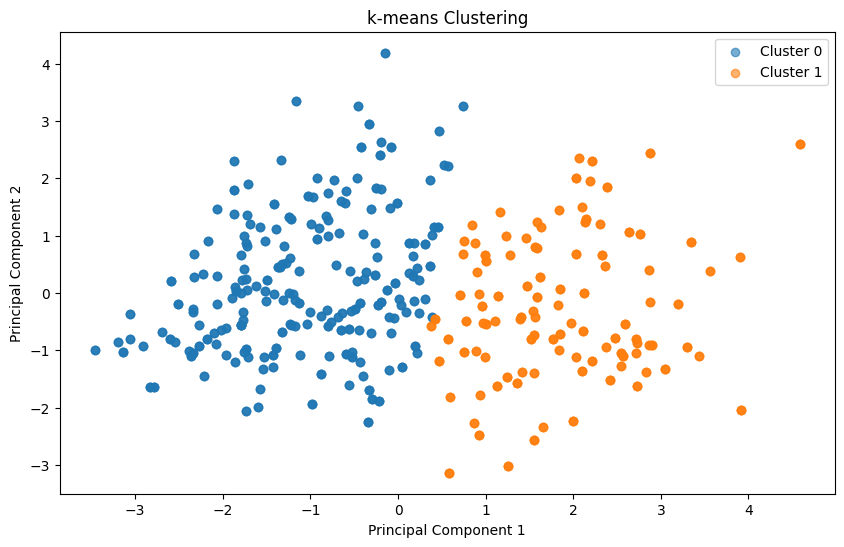

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in df_pca['cluster'].unique():
    subset = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('k-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# **Naive Bayes Algorithm **

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)


GaussianNB()

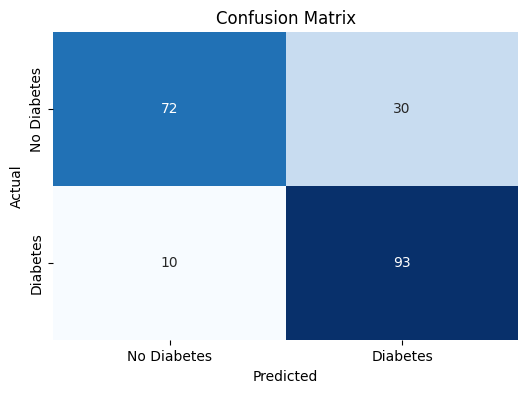

In [ ]:
import seaborn as sns

# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot the confusion matrix for your model
plot_confusion_matrix(y_test, y_pred)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.8
Confusion Matrix:
[[72 30]
 [11 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



# **Decision  tree**

In [ ]:
 # Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)


In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9853658536585366
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



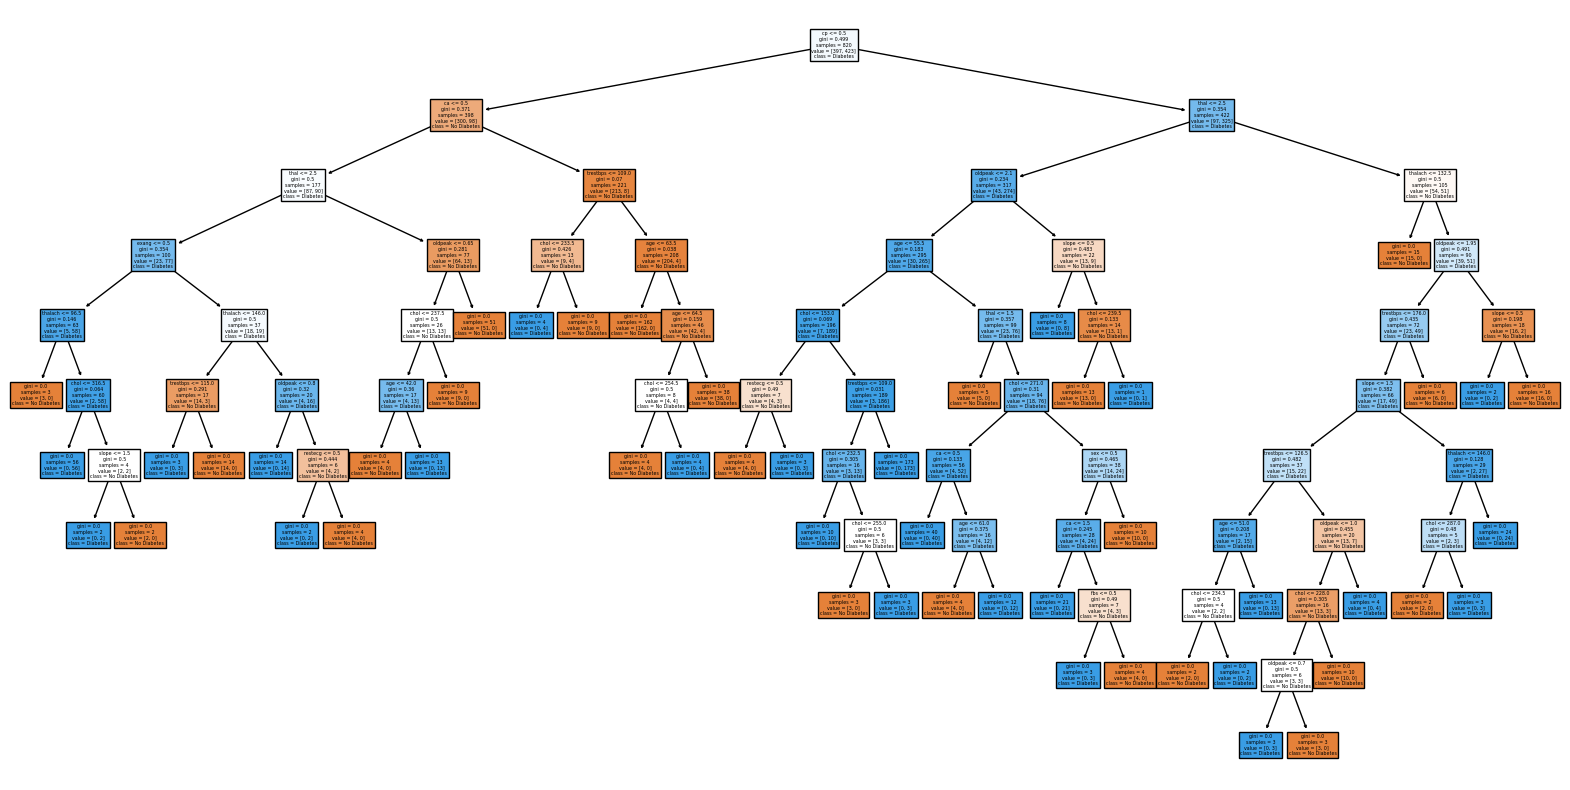

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()


# **CNN Algorithm**

In [ ]:
model = models.Sequential()
model.add(layers.Reshape((X.shape[1], 1), input_shape=(X.shape[1],)))
model.add(layers.Conv1D(32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
26/26 [==============================] - 5s 34ms/step - loss: 0.6053 - accuracy: 0.6902 - val_loss: 0.5304 - val_accuracy: 0.7268
Epoch 2/10
26/26 [==============================] - 0s 9ms/step - loss: 0.4817 - accuracy: 0.7805 - val_loss: 0.4794 - val_accuracy: 0.7707
Epoch 3/10
26/26 [==============================] - 0s 6ms/step - loss: 0.4375 - accuracy: 0.8049 - val_loss: 0.4594 - val_accuracy: 0.7756
Epoch 4/10
26/26 [==============================] - 0s 8ms/step - loss: 0.4165 - accuracy: 0.8159 - val_loss: 0.4429 - val_accuracy: 0.7659
Epoch 5/10
26/26 [==============================] - 0s 9ms/step - loss: 0.4029 - accuracy: 0.8207 - val_loss: 0.4323 - val_accuracy: 0.7854
Epoch 6/10
26/26 [==============================] - 0s 7ms/step - loss: 0.3861 - accuracy: 0.8378 - val_loss: 0.4213 - val_accuracy: 0.8146
Epoch 7/10
26/26 [==============================] - 0s 8ms/step - loss: 0.3741 - accuracy: 0.8390 - val_loss: 0.4166 - val_accuracy: 0.8146
Epoch 8/10
26/26 [=

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


7/7 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.8098
Test Accuracy: 80.98%


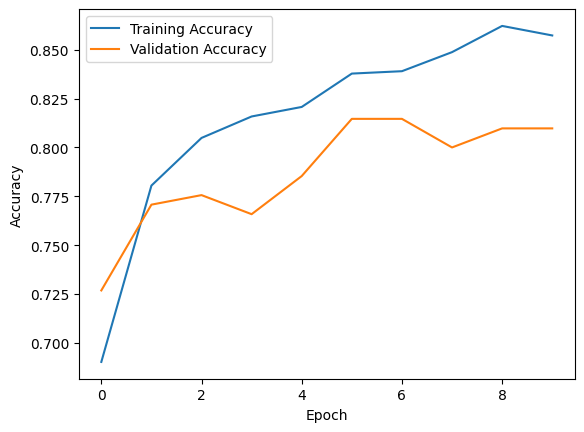

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **KNN algorithm **

In [ ]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Initialize and train the KNN model
k = 1  # You can adjust the value of k
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



In [ ]:
# Print the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 98.54%
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

1/1 [==============================] - 0s 245ms/step
[[0.]]
The Person does not have a Heart Disease


# save the train model **bold text**

In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'pickle' is not defined

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))